29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


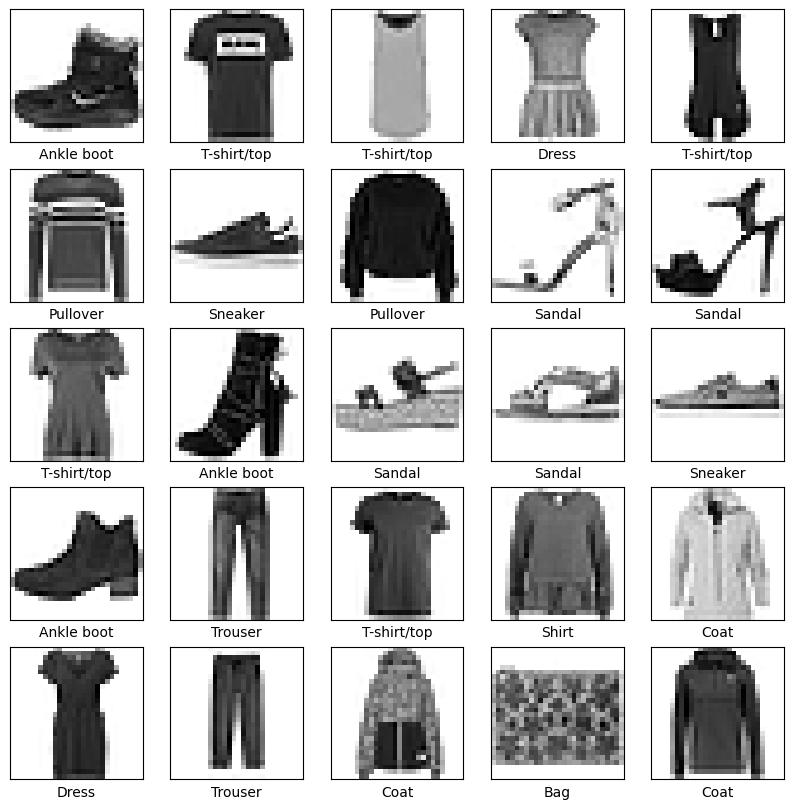

In [ ]:
import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

# 1. Loading data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Category Tags.
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2. Visualisation of partical data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[train_labels[i]])
plt.show()


In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

# Loading data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Flattening images for MLP
train_images_mlp = train_images.reshape(train_images.shape[0], 28*28).astype('float32') / 255
test_images_mlp = test_images.reshape(test_images.shape[0], 28*28).astype('float32') / 255

# One-hot coded labels
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Constructing the MLP model
mlp_model = Sequential()
mlp_model.add(Dense(256, input_dim=28*28, activation='relu'))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(num_classes, activation='softmax'))

# Compilation model
mlp_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Training Model
mlp_history = mlp_model.fit(train_images_mlp, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# Evaluation Models
mlp_loss, mlp_accuracy = mlp_model.evaluate(test_images_mlp, test_labels)
print(f'MLP Test Accuracy: {mlp_accuracy}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7029 - loss: 0.8359 - val_accuracy: 0.8396 - val_loss: 0.4333
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8403 - loss: 0.4467 - val_accuracy: 0.8487 - val_loss: 0.4087
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8572 - loss: 0.3915 - val_accuracy: 0.8689 - val_loss: 0.3521
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8676 - loss: 0.3651 - val_accuracy: 0.8652 - val_loss: 0.3679
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8720 - loss: 0.3471 - val_accuracy: 0.8812 - val_loss: 0.3383
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8796 - loss: 0.3283 - val_accuracy: 0.8711 - val_loss: 0.3498
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8854 - loss: 0.3164 - val_accuracy: 0.8863 - val_loss: 0.3218
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8864 - loss: 0.3073 - val_accurac

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
# Loading data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Data pre-processing
train_images_cnn = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255
test_images_cnn = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255
# One-hot coded label
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)


# Creating a CNN model
cnn_model = Sequential()

# Convolutional Layer + Maximum Pooling Layer
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(num_classes, activation='softmax'))

# Compilation model
cnn_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Training Model
cnn_history = cnn_model.fit(train_images_cnn, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# Evaluation Model
cnn_loss, cnn_accuracy = cnn_model.evaluate(test_images_cnn, test_labels)
print(f'CNN Test Accuracy: {cnn_accuracy}')


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 110ms/step - accuracy: 0.6776 - loss: 0.9016 - val_accuracy: 0.8553 - val_loss: 0.4035
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 109ms/step - accuracy: 0.8520 - loss: 0.4163 - val_accuracy: 0.8718 - val_loss: 0.3483
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 108ms/step - accuracy: 0.8743 - loss: 0.3412 - val_accuracy: 0.8890 - val_loss: 0.3116
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.8908 - loss: 0.2998 - val_accuracy: 0.8947 - val_loss: 0.2911
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 116ms/step - accuracy: 0.8971 - loss: 0.2804 - val_accuracy: 0.8978 - val_loss: 0.2763
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 106ms/step - accuracy: 0.9072 - loss: 0.2507 - val_accuracy: 0.8982 - val_loss: 0.2802
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 110ms/step - accuracy: 0.9104 - loss: 0.2399 - val_accuracy: 0.9017 - val_loss: 0.2886
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 106ms/step - accuracy: 0.9174 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


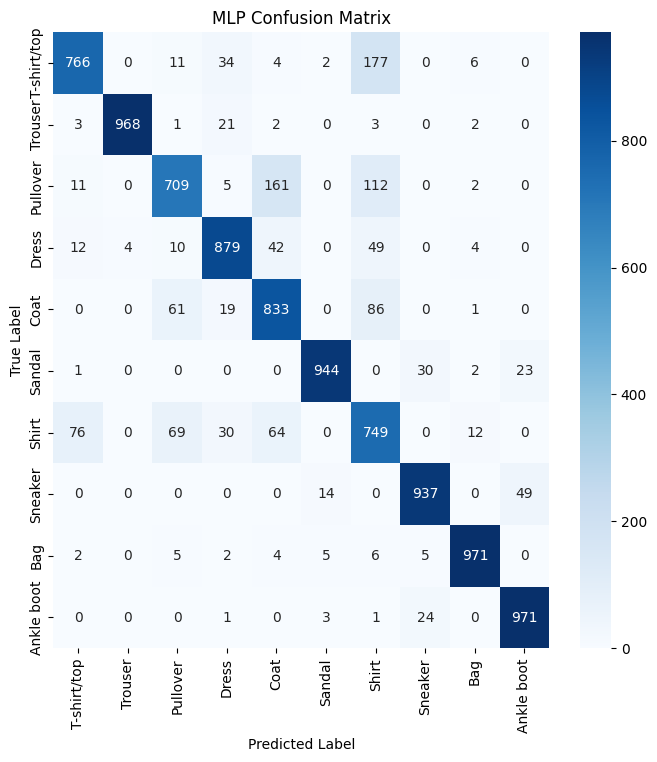

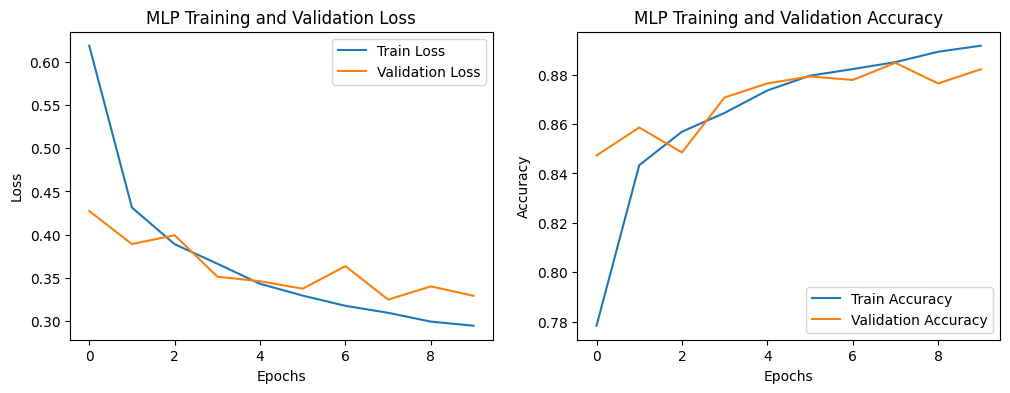

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Evaluation of the MLP model

mlp_predictions = np.argmax(mlp_model.predict(test_images_mlp), axis=1)
test_labels_true = np.argmax(test_labels, axis=1)

# Plotting the confusion matrix for MLP model
mlp_cm = confusion_matrix(test_labels_true, mlp_predictions)
plt.figure(figsize=(8, 8))
sns.heatmap(mlp_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("MLP Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plotting training loss and accuracy curves for MLP model
plt.figure(figsize=(12, 4))

# Plotting the loss curve
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'], label='Train Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('MLP Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy curve
plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['accuracy'], label='Train Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()




313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


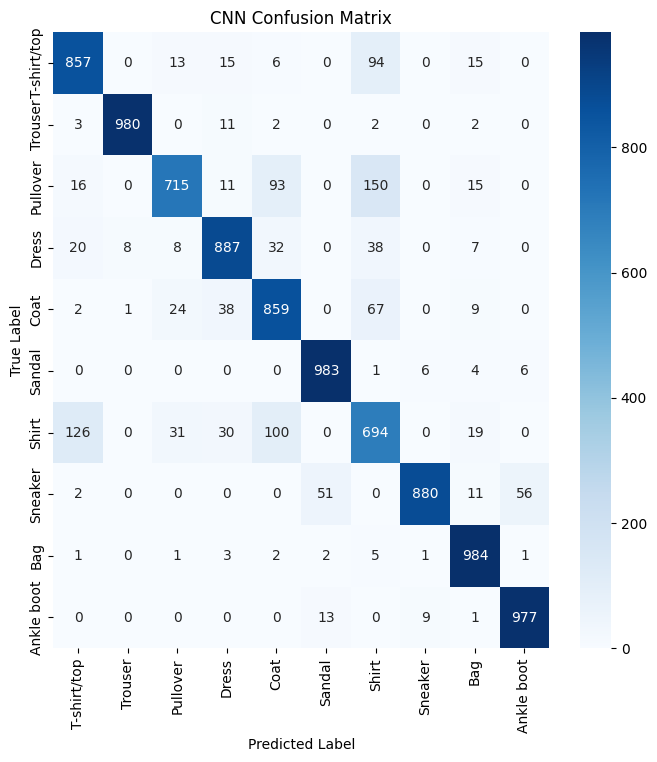

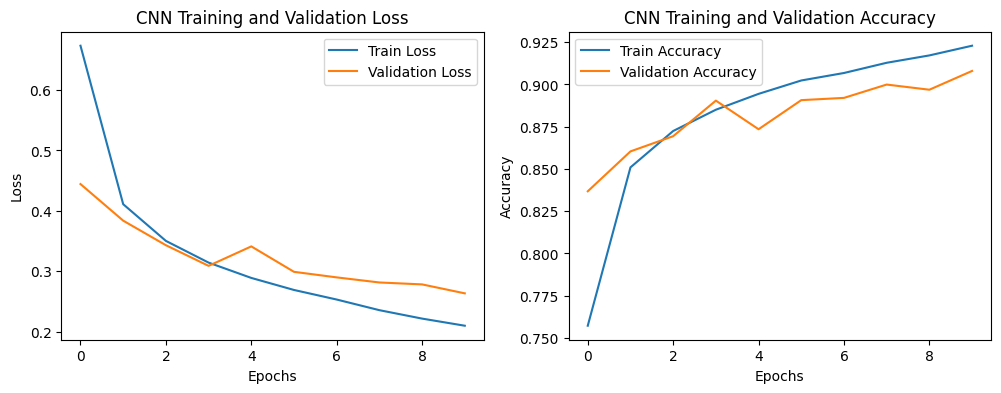

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cnn_predictions = np.argmax(cnn_model.predict(test_images_cnn), axis=1)
test_labels_true_cnn = np.argmax(test_labels, axis=1)

# Evaluating CNN model
cnn_predictions = np.argmax(cnn_model.predict(test_images), axis=1)

# Plotting the confusion matrix for CNN model
cnn_cm = confusion_matrix(test_labels_true_cnn, cnn_predictions)
plt.figure(figsize=(8, 8))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("CNN Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plotting training loss and accuracy curves for CNN model
plt.figure(figsize=(12, 4))

# Plotting loss curves
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy curve
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()